## Problème de Monty Hall : 




<img src="images/montyhall.png" alt="drawing" width="800"/>


**Problème de Monty Hall**

- Ce problème probabiliste a été popularisé par un jeu présenté par Monty Hall, d'où son nom. Il est possible de le résoudre analytiquement  (par le calcu, par exemple en appliquant la formule de Bayes)
- On peut simuler de nombreuses parties en appliquant différentes stratégies pour trouver la stratégie optimale.


**Enoncé** 


- Il y a 3 portes. Derrière l'une d'elle se cache une voiture, derrière les deux autres se cachent des chèvres.
    - Le présentateur vous demande une première fois sur quelle porte vous souhaitez parier.
    - Vous lui répondez
    - Ensuite, il élimine une des deux portes que vous n'avez pas choisi (toujours une derrière laquelle une chèvre se trouve).
    - Enfin, il vous propose de changer votre choix pour l'autre porte restante ou de rester sur votre première décision.
    
    
    
**Comment répondre au problème** 

- Les questions suivantes sont "assez" équivalentes
    - Quelle est la stratégie optimale ?
    - Quelle est la probabilité de gagner si on change systématiquement de porte ? Si on ne change jamais de porte ?
    - Pour maximiser la probabilité de gagner, faut-il garder la même porte ou changer de porte ? 

**Implémentation**

- Coder un programme qui permet : 
    - 1. A un utilisateur de jouer à ce jeu 
    - 2. A une IA qui choisit une porte au hasard et ne change jamais son choix de jouer à ce jeu
    - 3. A une IA qui choisit une porte au hasard et change toujours son choix pour la porte non éliminée par le présentateur de jouer à ce jeu
    - 4. A une IA qui change de porte avec une propabilité p choisit par l'utilisateur de jouer à ce jeu
- Ensuite, coder un programme qui permet :
    - 5. De simuler 1000 partie avec l'une des IA codées précédemment
    - 6. De calculer le pourcentage de parties gagnées par chaque IA

        


**Conseils**

- On peut soit faire une implémentation avec des fonctions, soit avec des classes. En revanche, il ne faut pas écrire juste des scripts qui ne seront pas faciles à ré-executer dans un autre contexte, parce que le but va être de réutiliser son code plusieurs fois (par exemple pour simuler les 1000 parties).

- On peut par exemple écrire une classe qui aurait pour argument d'initialisation un ``user``, un nombre de parties à jour ``n_games`` et décomposer en une méthode pour jouer une partie ``run_one_game`` et une méthode qui lance plusieurs parties ``run_many_games`` . Il est conseillé d'écrire de plus petites méthodes que l'on appelle dans ces méthodes pour que le code soit plus lisible et limiter les niveaux d'indentation.
        
        
- Il est tout à fait possible d'utiliser des fonctions et pas des classes, par exemple en utilisant une fonction qui renvoie un nombre, 0 en cas de défaite et un en cas de victoire. On pourrait par exemple avoir une fonction par type d'utilisateur

In [10]:
import random
import matplotlib.pyplot as plt
import pandas as pd

class MontyHall:
    
    def __init__(self, user, n_games=100, verbose=False):
        self.n_games = n_games
        self.user = user
        self.verbose = verbose
        self.victory_count = 0
        
    def get_user_first_input(self):
        """Get the user input"""
        answer = None
        while answer not in [1, 2, 3]:
            print("Derrière quelle porte se cache la voiture ?")
            try:
                answer = int(input())
            except:
                print("Saisissez une valeur entre 1 et 3 s'il vous plait")
        return answer
    
    def get_ia_first_input(self):
        return random.choice([1, 2, 3])
    
    def get_good_and_wrong_doors(self):
        good_door = random.randint(1, 3)
        wrong_doors = [x for x in range(1, 4) if x != good_door]
        return good_door, wrong_doors
    
    def get_wrong_door_announced(self, answer, good_door, wrong_doors):
        if answer == good_door:
            wrong_door_anounced = random.choice(wrong_doors)
        else:
            wrong_door_anounced = [x for x in wrong_doors if x != answer][0]
        return wrong_door_anounced
    
    def get_new_answers(self, wrong_door_anounced):
        new_answers = [x for x in [1, 2, 3] if x != wrong_door_anounced]
        return new_answers
    
    def get_human_second_input(self, wrong_door_anounced, new_answers):
        print(wrong_door_anounced, "was a wrong door")
        print(f"Saisissez {new_answers[0]} ou {new_answers[1]}")
        new_answer = None
        while new_answer not in new_answers:
            print("Derrière quelle porte se cache la voiture ?")
            try:
                new_answer = int(input())
            except:
                print(f"Saisissez une valeur dans {' ,'.join(new_answers)} s'il vous plait")
        return new_answer
    
    def display_game_info(self, good_door, answer, new_answer):
        if (self.user.startswith("ia")) & (self.verbose):
            win = "VICTOIRE" if good_door == answer else "DEFAITE"
            print(f"{win} - la porte était {good_door} et vous avez choisi {answer} puis {new_answer}")
            
        if (self.user == "human" ) & (self.verbose):
            if new_answer == good_door:
                print("Vous avez gagné !!")
            else:
                print("Vous avez perdu")
            print("\n" + "#" * 10 + "\n")
        
    def run_one_game(self):
        """Run one game"""
        good_door, wrong_doors = self.get_good_and_wrong_doors()
        
        # Get first answer from user
        if self.user == "human":
            answer = self.get_user_first_input()
        elif self.user.startswith("ia"):
            answer = self.get_ia_first_input()
        
        # Compute wrong door announced and possible new answers
        wrong_door_anounced = self.get_wrong_door_announced(answer, good_door, wrong_doors)
        new_answers = self.get_new_answers(wrong_door_anounced)
        
        # Get second answer from user
        if self.user == "human":
            new_answer = self.get_human_second_input(wrong_door_anounced, new_answers)
        elif self.user == "ia_dumb":
            new_answer = answer
        elif self.user == "ia_smart":
            new_answer = [x for x in new_answers if x != answer][0]
        
        # Increment victory_count if won
        if new_answer == good_door:
            self.victory_count += 1
        
        # Display info
        self.display_game_info(good_door, answer, new_answer)

    def many_games(self):
        for _ in range(self.n_games):
            self.run_one_game()

## Humain

In [11]:
mh = MontyHall(user="human", n_games=10, verbose=True)
mh.many_games()
print(f"{mh.victory_count} victoire sur {mh.n_games} parties - soit {'{:.2%}'.format(mh.victory_count / mh.n_games)}")

Derrière quelle porte se cache la voiture ?


 1


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 2


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 1


2 was a wrong door
Saisissez 1 ou 3
Derrière quelle porte se cache la voiture ?


 3


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 1


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 2


Vous avez perdu

##########

Derrière quelle porte se cache la voiture ?


 2


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 2


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 1


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 2


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 2


1 was a wrong door
Saisissez 2 ou 3
Derrière quelle porte se cache la voiture ?


 3


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 2


3 was a wrong door
Saisissez 1 ou 2
Derrière quelle porte se cache la voiture ?


 1


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 2


1 was a wrong door
Saisissez 2 ou 3
Derrière quelle porte se cache la voiture ?


 3


Vous avez gagné !!

##########

Derrière quelle porte se cache la voiture ?


 2


1 was a wrong door
Saisissez 2 ou 3
Derrière quelle porte se cache la voiture ?


 1


Derrière quelle porte se cache la voiture ?


 2


Vous avez perdu

##########

Derrière quelle porte se cache la voiture ?


 2


1 was a wrong door
Saisissez 2 ou 3
Derrière quelle porte se cache la voiture ?


 3


Vous avez gagné !!

##########

8 victoire sur 10 parties - soit 80.00%


## IA - 10 000 parties pour chaque IA

IA :0
3412 victoire sur 10000 parties - soit 34.12%
IA :1
6700 victoire sur 10000 parties - soit 67.00%


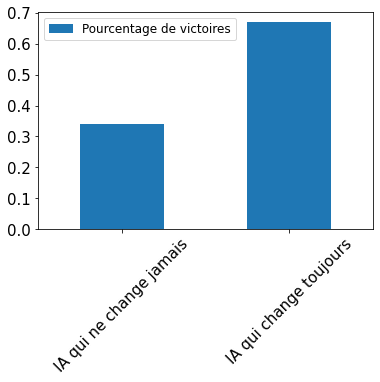

In [12]:
ia_1 = "ia_dumb"
ia_2 = "ia_smart"

stats_ia = {}
for idx, ia in enumerate([ia_1, ia_2]):
    mh = MontyHall(user=ia, n_games=10000, verbose=False)
    mh.many_games()
    print("IA :{}".format(idx))
    print(f"{mh.victory_count} victoire sur {mh.n_games} parties - soit {'{:.2%}'.format(mh.victory_count / mh.n_games)}")
    stats_ia[ia] = (mh.victory_count / mh.n_games)
    
df = pd.DataFrame.from_dict(stats_ia, orient='index', columns=["Pourcentage de victoires"])
df = df.rename(index={ia_1:"IA qui ne change jamais", ia_2: "IA qui change toujours"})
df.plot.bar(rot=45, fontsize=15)
plt.legend(fontsize=12)
#plt.title("Pourcentage de victoire par IA")
plt.show()

## Evolution du pourcentage de parties gagnées en fonction du nombre de parties

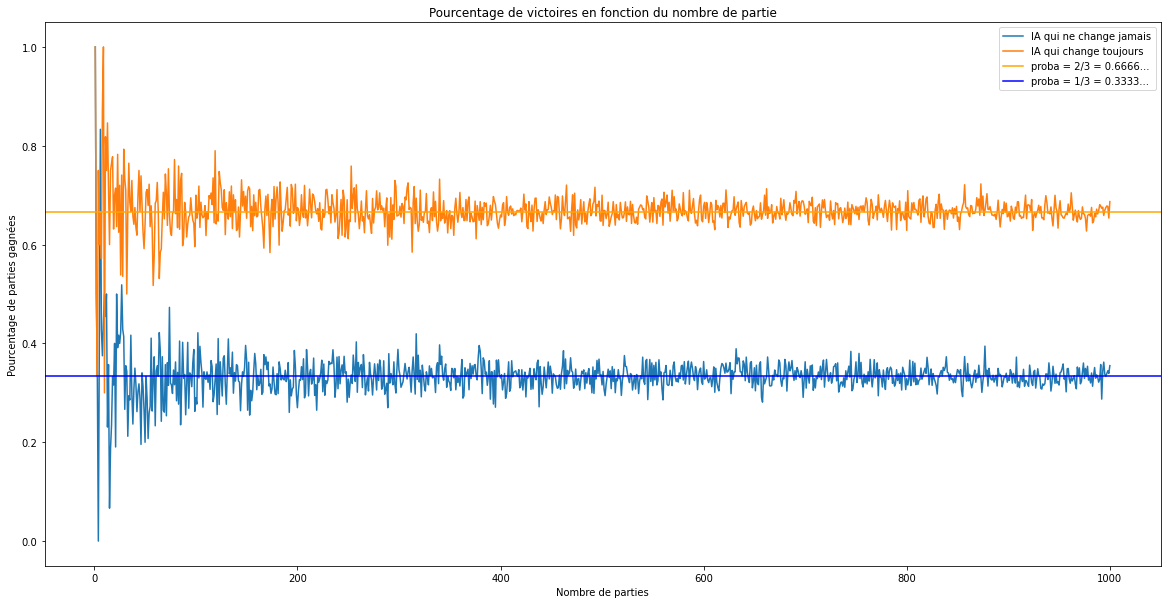

In [13]:
stats_ia = {ia_1: [], ia_2: []}
for x in range(1,1001):
    for ia in [ia_1, ia_2]:
        mh = MontyHall(user=ia, n_games=x)
        mh.many_games()
        #print(f"{mh.victory_count} victoire sur {mh.n_games} parties - soit {'{:.2%}'.format(mh.victory_count / mh.n_games)}")
        stats_ia[ia].append(mh.victory_count / mh.n_games)
        
        
df = pd.DataFrame.from_dict(stats_ia, orient='index').T
df.index = range(1, 1001)
df = df.rename(columns={ia_1:"IA qui ne change jamais", ia_2: "IA qui change toujours"})
df.plot(figsize=(20,10))
plt.axhline(2/3, color='orange', label="proba = 2/3 = 0.6666...")
plt.axhline(1/3, color='blue', label="proba = 1/3 = 0.3333...")
plt.legend()
plt.title("Pourcentage de victoires en fonction du nombre de partie")
plt.xlabel("Nombre de parties")
plt.ylabel("Pourcentage de parties gagnées")
plt.show()

In [14]:
mh = MontyHall(user='ia_dumb', n_games=1000)
mh.many_games()
mh.victory_count

317